In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S3/Office_Amelie-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (239, 24, 1)
y_train.shape =  (239, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
Total params: 7,800
Trainable params: 7,800
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
2/2 [==============================] - 10s 60ms/step - loss: 1375.5437
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 1371.6401
Epoch 3/300
2/2 [==============================] - 0s 33ms/step - loss: 1368.3400
Epoch 4/300
2/2 [==============================] - 0s 36ms/step - loss: 1365.1206
Epoch 5/300
2/2 [==============================] - 0s 33ms/step - loss: 1362.0319
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 1358.9456
Epoch 7/300
2/2 [==============================] - 0s 35ms/step - loss: 1355.9657
Epoch 8/300
2/2 [==============================] - 0s 31ms/step - loss: 1352.9827
Epoch 9/300
2/2 [==============================] - 0s 29ms/step - loss: 1349.9391
Epoch 10/300
2/2 [==============================] - 0s 28ms/step - loss: 1346.9474
Epoch 11/300
2/2 [==============================] - 0s 28ms/step - loss: 1343.9315
Epoch 12/300
2/2 [==============================] - 0s 29ms/step - loss: 1340.8824
Epoch 13/300

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 26.582307836510477
Root Mean Squared Error for Stacked LSTM Model for testing is: 32.010847084204656
Mean Absolute Error for Stacked LSTM Model for training is: 16.88454698491462
Mean Absolute Error for Stacked LSTM Model for testing is: 23.149082159557565
MAPE for Stacked Model for training is: 0.44592773740481545
MAPE for Stacked Model for testing is: 0.489659749920109


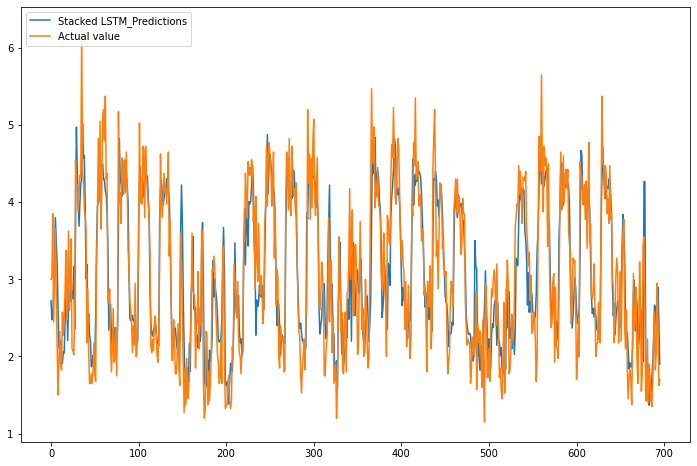

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.]), array([2.7226593], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.27734065]), array([0.5505383]), array([1.31016803]), array([-0.40590954]), array([-0.22598219]), array([-0.14940476]), array([-0.71705794]), array([-1.10811782]), array([-1.15182781]), array([-0.15882015]), array([0.17121029]), array([-0.30754173]), array([-0.13833106]), array([0.66732228]), array([0.21713233]), array([0.45538521]), array([0.42039704]), array([0.60871601]), array([-0.5164125]), array([0.61748815]), array([0.94790983]), array([-0.57547355]), array([0.26606083]), array([0.81322837]), array([-0.74581432]), array([-0.67471743]), array([-1.13911939]), array([0.06915665]), array([0.94618487]), array([-0.74838591]), array([-0.1764555]), array([-0.21730232]), array([0.43620038]), array([0.35929704]), array([0.08284044]), array([1.97547674]), array([-0.6194253]), array([-0.29306459]), array([-0.68265533]), array([-0.17077351]), array([0.64385581]), array([-1.02019811]), array([0.47714901]), array([-0.50792551]), array([-0.6280086]), array([-0.56075037]), array([-0.090

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.97547674]), array([-1.77208495]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(361, 335)